# 1 Pré-processamento


## 1.1 - Importando os dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/ocarane/machine_learning/main/Customer-Churn.csv")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.2 - Diferentes Variáveis

In [ ]:
for col in dados.columns:
  print(col, dados[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [ ]:
#Modificando
a_troca = {'Sim': 1,
           'Nao': 0}
dadosbin = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(a_troca)
dadosbin.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#transformação pelo get_dumies (com classes múltiplas)

dummie_dados = pd.get_dummies(dados[['VariasLinhasTelefonicas', 'ServicoDeInternet', 'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo', 'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato', 'FormaDePagamento']])
dummie_dados.head()

,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,False,True,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False
1,True,False,False,True,False,False,False,False,True,True,...,True,False,False,False,False,True,False,False,True,False
2,True,False,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
3,False,True,False,True,False,False,False,False,True,True,...,True,False,False,False,False,True,False,False,False,True
4,True,False,False,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
dados_final = pd.concat([dadosbin, dummie_dados, dados[['MesesDeContrato', 'ContaMensal', 'Maior65Anos']]], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,...,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,MesesDeContrato,ContaMensal,Maior65Anos
0,1,0,0,1,0,False,True,False,True,False,...,False,True,False,False,True,False,False,1,29.85,0
1,0,0,1,0,0,True,False,False,True,False,...,False,False,True,False,False,True,False,34,56.95,0
2,0,0,1,1,1,True,False,False,True,False,...,False,True,False,False,False,True,False,2,53.85,0
3,0,0,0,0,0,False,True,False,True,False,...,False,False,True,False,False,False,True,45,42.30,0
4,0,0,1,1,1,True,False,False,False,True,...,False,True,False,False,True,False,False,2,70.70,0


## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [ ]:
#DICA
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,MesesDeContrato,ContaMensal,Maior65Anos
0,1,0,0,1,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1,29.85,0
1,0,0,1,0,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,34,56.95,0
2,0,0,1,1,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,2,53.85,0
3,0,0,0,0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,45,42.30,0
4,0,0,1,1,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,2,70.70,0



$y_i$ = $f(x_i)$

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 Balanceamento dos dados

In [ ]:
dados_final['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

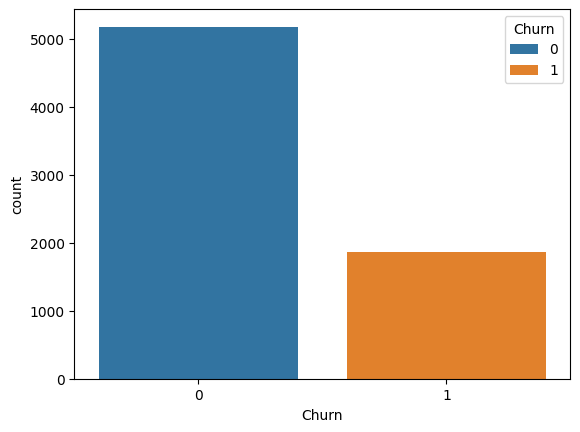

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Churn", hue= 'Churn', data=dados_final)

In [ ]:
from imblearn.over_sampling import SMOTE

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [ ]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [ ]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [ ]:
dados_final = pd.concat([X, y], axis=1)

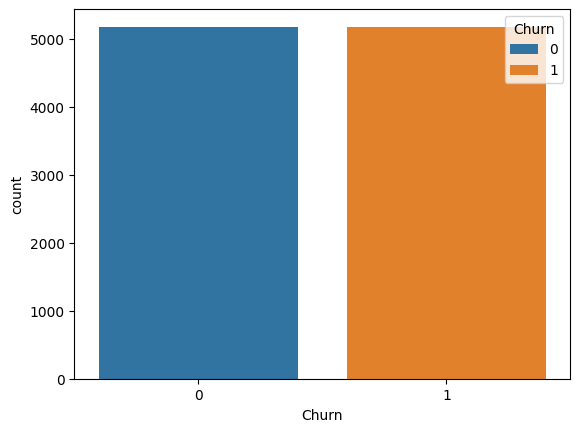

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Churn", hue= 'Churn', data=dados_final)

## 2 Support Vector Classifier (SVC)

In [ ]:
#Importando Bibliotecas
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Separar Features e Classes
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Normalizar Dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

#Treino e Teste
seed = 123
train_x, test_x, train_y, test_y = train_test_split(X_normalizado, y,random_state=seed, test_size = 0.25, stratify = y) #stratify mantém a proporção de 0's e 1's no treino e no teste

#Instanciar o Modelo
svc = SVC(gamma = 'auto', random_state=seed)

#Treniar o Modelo
svc.fit(train_x, train_y)

#Testar o Modelo
previsoesSVC = svc.predict(test_x)

#Avaliar o Modelo SVC
#print(accuracy_score(test_y, previsoesSVC))

#Usar o Modelo
Xmaria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria_normalizado))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(Xmaria_normalizado)

[[-0.79008532 -0.52726104  0.32688889  0.81449258 -0.99575697 -0.32688889
  79.04259342  1.48315631 -1.05853285 -0.44850949 -1.2850268   2.22960721
  -0.59625062  0.91151321 -0.44850949 -0.73976267 -1.08771428 -0.44850949
   1.35149921  0.78589647  2.22960721 -0.60667885 -0.91828591  2.22960721
  -0.84672335  1.10610293 -0.44850949 -0.85770576 -0.4605816  -1.45333425
   2.1147664  -0.50805069 -0.94910918  1.82723399 -0.53130034 -1.14939314
  -2.35953146  2.42023171]]


## 3 Modelo K-nearest neighbors (KNN) - método baseado na proximidade


## 3.1 Implementando Modelo

In [ ]:
#biblioteca ára criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Separar Features e Classes
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Normalizar Dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

#Treino e Teste
seed = 123
train_x, test_x, train_y, test_y = train_test_split(X_normalizado, y,random_state=seed, test_size = 0.25, stratify = y) #stratify mantém a proporção de 0's e 1's no treino e no teste

#Instanciar o Modelo
knn = KNeighborsClassifier(metric = 'euclidean')

#Treniar o Modelo
knn.fit(train_x, train_y)

#Testar o Modelo
previsoesKNN = knn.predict(test_x)

#Avaliar o Modelo SVC
#print(accuracy_score(test_y, previsoesKNN))

#Usar o Modelo
Xmaria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria_normalizado))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 3.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

# 4 Método probabilístico

## 4.1 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

In [ ]:
#biblioteca ára criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Separar Features e Classes
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Normalizar Dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

#Treino e Teste
seed = 123
train_x, test_x, train_y, test_y = train_test_split(X_normalizado, y,random_state=seed, test_size = 0.25, stratify = y) #stratify mantém a proporção de 0's e 1's no treino e no teste

#Instanciar o Modelo
knn = KNeighborsClassifier(metric = 'euclidean')

#Treniar o Modelo
knn.fit(train_x, train_y)

#Testar o Modelo
previsoesKNN = knn.predict(test_x)

#Avaliar o Modelo SVC
#print(accuracy_score(test_y, previsoesKNN))

#Usar o Modelo
Xmaria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria_normalizado))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 4.2 - Modelo Bernoulli Naive Bayes



$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

In [ ]:
#biblioteca ára criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
import numpy as np

#Separar Features e Classes
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Normalizar Dados
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(X)

#Treino e Teste
seed = 123
train_x, test_x, train_y, test_y = train_test_split(X, y,random_state=seed, test_size = 0.25, stratify = y) #stratify mantém a proporção de 0's e 1's no treino e no teste

#Instanciar o Modelo
mnb = MultinomialNB()

#Treniar o Modelo
mnb.fit(train_x, train_y)

#Testar o Modelo
previsoesNB = mnb.predict(test_x)

#Avaliar o Modelo SVC
#print(accuracy_score(test_y, previsoesKNN))

#Usar o Modelo
#Xmaria_normalizado = norm.transform(Xmaria)
#print(svc.predict(Xmaria_normalizado))
print(mnb.predict(Xmaria))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# 5 Método Simbólico - Árvore de Decisão

## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


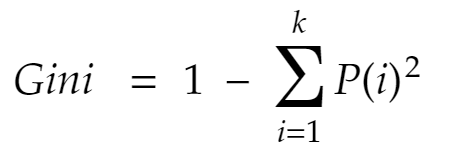

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

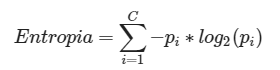


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


In [ ]:
#biblioteca ára criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#Separar Features e Classes
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Normalizar Dados
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(X)

#Treino e Teste
seed = 123
train_x, test_x, train_y, test_y = train_test_split(X, y,random_state=seed, test_size = 0.25, stratify = y) #stratify mantém a proporção de 0's e 1's no treino e no teste

#Instanciar o Modelo
dtc = DecisionTreeClassifier(max_depth=5)

#Treniar o Modelo
dtc.fit(train_x, train_y)

#Testar o Modelo
previsoesDTC = dtc.predict(test_x)

#Avaliar o Modelo SVC
#print(accuracy_score(test_y, previsoesKNN))

#Usar o Modelo
#Xmaria_normalizado = norm.transform(Xmaria)
#print(svc.predict(Xmaria_normalizado))
print(dtc.predict(Xmaria))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 6 Validação dos modelos

## 6.1 - Matriz de confusão



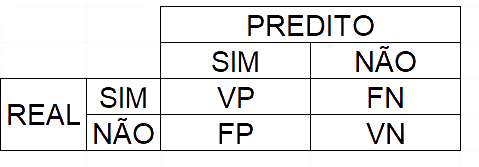

In [ ]:
#Criando uma matriz de confusão
from sklearn.metrics import confusion_matrix
mc_svc = confusion_matrix(test_y, previsoesSVC)
mc_knn = confusion_matrix(test_y, previsoesKNN)
mc_DTC = confusion_matrix(test_y, previsoesDTC)
mc_NB = confusion_matrix(test_y, previsoesNB)
print(mc_svc)
print(mc_knn)

[[1109  185]
 [ 235 1058]]
[[ 859  435]
 [ 175 1118]]


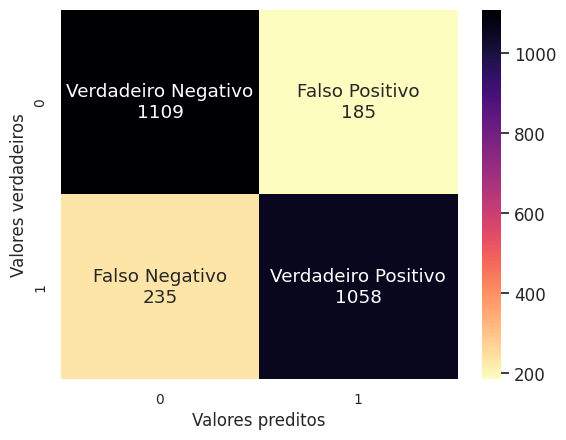

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)

categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

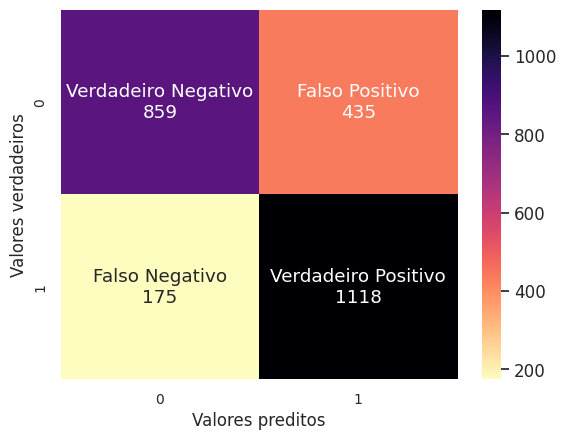

In [ ]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

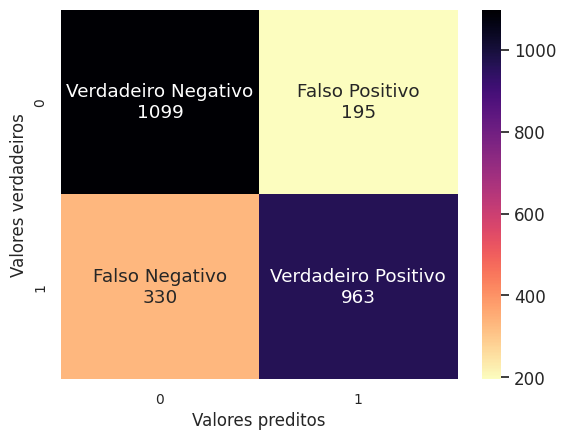

In [ ]:
gerando_matriz(mc_DTC, labels, categorias, cmap="magma_r")

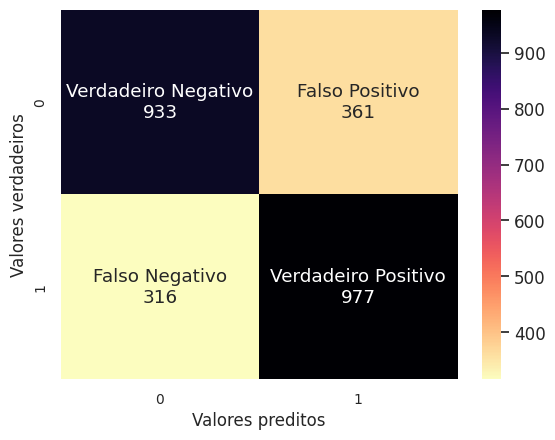

In [ ]:
gerando_matriz(mc_NB, labels, categorias, cmap="magma_r")

## 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, previsoesSVC))
print(accuracy_score(test_y, previsoesKNN))
print(accuracy_score(test_y, previsoesDTC))
print(accuracy_score(test_y, previsoesNB))

0.8376497873985311
0.7642056436026285
0.7970622342481639
0.7383069192114419


## 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(test_y, previsoesSVC))
print(precision_score(test_y, previsoesKNN))
print(precision_score(test_y, previsoesDTC))
print(precision_score(test_y, previsoesNB))

0.8511665325824618
0.7198969735994849
0.8316062176165803
0.7301943198804185


## 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(test_y, previsoesSVC))
print(recall_score(test_y, previsoesKNN))
print(recall_score(test_y, previsoesDTC))
print(recall_score(test_y, previsoesNB))

0.8182521268368136
0.8646558391337974
0.7447795823665894
0.7556071152358855


## 6.5 - Escolhendo o melhor modelo


In [1]:
print("O modelo escolhido foi o SVC")

O modelo escolhido foi o SVC
